In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [31]:
df = pd.read_csv('C:/Users/blabl/PycharmProjects/alms-classification-2020-dbf70c3e11fa/data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [32]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [33]:
df['year'] = df.Day.dt.year

In [34]:
year_max = df.groupby("year").aggregate({'t' : 'mean'}).idxmax(axis = 0).values[0]
year_min = df.groupby("year").aggregate({'t' : 'mean'}).idxmin(axis = 0).values[0]
print(year_max, year_min)

2015 2012


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [35]:
df['mounth'] = df.Day.dt.month

In [37]:
df.rename({'mounth' : 'month'})
warmest_jan = df[((df.mounth == 1) & (df.t >= 0))].groupby('year').agg({'t' : 'count'}).idxmax().values[0]

**3.** В каком году было самое холодное лето (по средней температуре)

In [40]:
coldest_summ = df[((df.mounth >= 6) & (df.mounth <= 8))].groupby('year').agg({'t':'mean'}).idxmin().values[0]

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [65]:
df['diff'] = abs(df.t.diff())
df.iloc[[df['diff'].idxmax()]]

,Day,t,year,mounth,diff
2335,2014-05-27,7,2014,5,15.0


In [82]:
biggest_diff_day = df[df['diff'].max() == df['diff']].Day.values[0] - np.timedelta64(1, 'D')
biggest_diff_day

numpy.datetime64('2014-05-26T00:00:00.000000000')

In [78]:
np.timedelta64(1)

numpy.timedelta64(1)

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

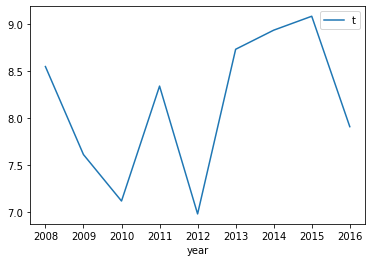

In [86]:
df.groupby('year', as_index = False).agg({'t' : 'mean'}).plot(x = 'year', y = 't')